In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.dates as mdates
import numpy.matlib
from statsmodels.tsa.stattools import adfuller
from numpy import log
from dateutil.parser import parse
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression

import math


In [2]:
pd.set_option('display.max_columns', 30)
df = pd.read_csv('weatherAUS.csv', index_col=0, parse_dates=True)


In [3]:
df=df[df.Location=='Sydney']

In [4]:
df['Year'] = df.index.year
df['Quarter'] = df.index.quarter
df['Month'] = df.index.month
df['Weakday'] = df.index.weekday
df['Day'] = df.index.day

In [5]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Quarter,Month,Weakday,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes,2008,1,2,4,1
2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes,2008,1,2,5,2
2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes,2008,1,2,6,3
2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes,2008,1,2,0,4
2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes,2008,1,2,1,5


# EDA MVA: MaxTemp Data for Sydney



In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Quarter,Month,Weakday,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes,2008,1,2,4,1
2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes,2008,1,2,5,2
2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes,2008,1,2,6,3
2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes,2008,1,2,0,4
2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes,2008,1,2,1,5


In [7]:
df.dropna(subset=["MaxTemp"], inplace=True)

In [83]:
#df=df.asfreq('d')

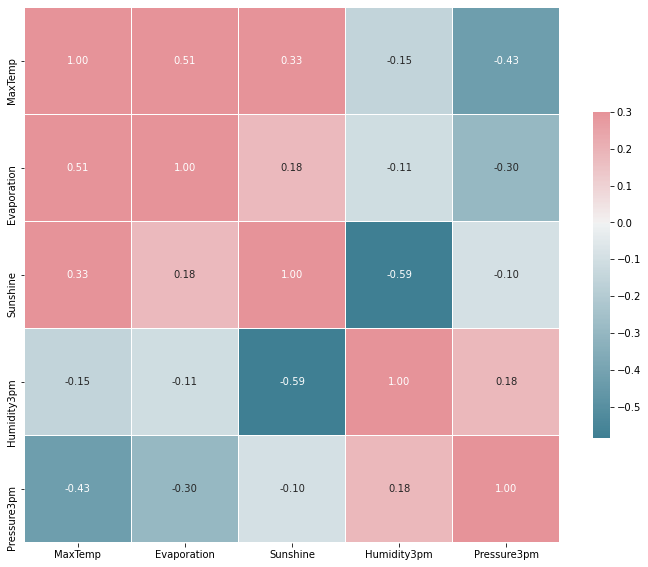

In [18]:
plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['MaxTemp','Evaporation', 'Sunshine', 'Humidity3pm', 'Pressure3pm']].corr(),vmax=.3, annot=True,center=0, cmap=cmap, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .6});

In [9]:
#features: MinTemp, Humidity3pm, Pressure3pm,City
df.isna().sum()

Location            0
MinTemp             2
MaxTemp             0
Rainfall            6
Evaporation        51
Sunshine           15
WindGustDir      1034
WindGustSpeed    1034
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        13
Humidity3pm        13
Pressure9am        19
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             3
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
Year                0
Quarter             0
Month               0
Weakday             0
Day                 0
dtype: int64

In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Quarter,Month,Weakday,Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes,2008,1,2,4,1
2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes,2008,1,2,5,2
2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes,2008,1,2,6,3
2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes,2008,1,2,0,4
2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes,2008,1,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,0.0,No,2017,2,6,2,21
2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,0.0,No,2017,2,6,3,22
2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,0.0,No,2017,2,6,4,23


In [19]:
df.Humidity3pm.interpolate(inplace=True)
df.Pressure3pm.interpolate(inplace=True)
df.Evaporation.interpolate(inplace=True)
df.Sunshine.interpolate(inplace=True)

In [10]:
df.MaxTemp

Date
2008-02-01    22.4
2008-02-02    25.6
2008-02-03    24.5
2008-02-04    22.8
2008-02-05    25.7
              ... 
2017-06-21    19.6
2017-06-22    19.2
2017-06-23    17.7
2017-06-24    19.3
2017-06-25    19.3
Name: MaxTemp, Length: 3335, dtype: float64

In [12]:
df.MaxTemp.shift(2).dropna()

Date
2008-02-03    22.4
2008-02-04    25.6
2008-02-05    24.5
2008-02-06    22.8
2008-02-07    25.7
              ... 
2017-06-21    18.3
2017-06-22    20.0
2017-06-23    19.6
2017-06-24    19.2
2017-06-25    17.7
Name: MaxTemp, Length: 3333, dtype: float64

In [20]:
df2 = pd.DataFrame()
df2["MaxTemp"] = df["MaxTemp"]
df2["Max_Temp_2lag"] = df["MaxTemp"].shift(2)
df2["Humidity3pm_2lag"] = df["Humidity3pm"].shift(2)
df2["Sunshine_2lag"] = df["Sunshine"].shift(2)

df2["Pressure3pm_2lag"] = df["Pressure3pm"].shift(2)
df2["Evaporation_2lag"] = df["Evaporation"].shift(2)

df2.dropna(inplace=True)

In [14]:
df2

,MaxTemp,Max_Temp_2lag,Humidity3pm_2lag,Sunshine_2lag,Pressure3pm_2lag,Evaporation_2lag
Date,,,,,,
2008-02-03,24.5,22.4,84.0,0.0,1017.4,6.2
2008-02-04,22.8,25.6,73.0,2.7,1016.4,3.4
2008-02-05,25.7,24.5,86.0,0.1,1015.6,2.4
2008-02-06,27.2,22.8,90.0,0.0,1011.8,2.2
2008-02-07,26.3,25.7,74.0,0.0,1004.8,2.4
...,...,...,...,...,...,...
2017-06-21,19.6,18.3,69.0,1.9,1028.4,2.2
2017-06-22,19.2,20.0,60.0,5.8,1025.2,2.2
2017-06-23,17.7,19.6,52.0,7.8,1025.3,2.0


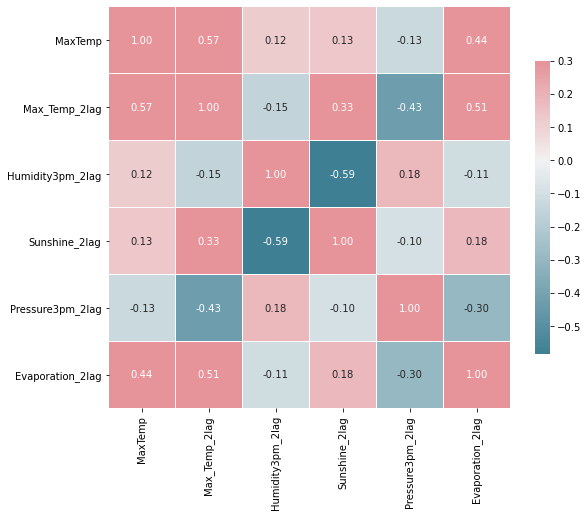

In [21]:
plt.subplots(figsize=(9,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df2.corr(),vmax=.3, annot=True,center=0, cmap=cmap, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .6});

In [22]:
y=df2.pop('MaxTemp')
X = df2
train_size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(X_train)))
print('Testing Observations: %d' % (len(X_test)))

Observations: 3333
Training Observations: 2499
Testing Observations: 834


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

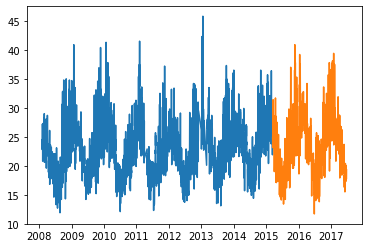

In [25]:
plt.plot(y_train)
plt.plot(y_test)

In [118]:
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu',kernel_initializer = 'uniform'))
model.add(Dense(32, input_dim=5, activation='relu',kernel_initializer = 'uniform'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=16, verbose=2)


Epoch 1/50
157/157 - 1s - loss: 477.5337 - val_loss: 331.9504
Epoch 2/50
157/157 - 0s - loss: 131.6280 - val_loss: 34.4337
Epoch 3/50
157/157 - 0s - loss: 24.8126 - val_loss: 20.9887
Epoch 4/50
157/157 - 0s - loss: 17.4498 - val_loss: 16.8196
Epoch 5/50
157/157 - 0s - loss: 14.5668 - val_loss: 14.8393
Epoch 6/50
157/157 - 0s - loss: 13.1778 - val_loss: 13.8250
Epoch 7/50
157/157 - 0s - loss: 12.4529 - val_loss: 13.1489
Epoch 8/50
157/157 - 0s - loss: 12.0476 - val_loss: 12.8056
Epoch 9/50
157/157 - 0s - loss: 11.7916 - val_loss: 12.5623
Epoch 10/50
157/157 - 0s - loss: 11.6820 - val_loss: 12.4329
Epoch 11/50
157/157 - 0s - loss: 11.6267 - val_loss: 12.3051
Epoch 12/50
157/157 - 0s - loss: 11.5254 - val_loss: 12.3494
Epoch 13/50
157/157 - 0s - loss: 11.4474 - val_loss: 12.1160
Epoch 14/50
157/157 - 0s - loss: 11.4176 - val_loss: 12.2381
Epoch 15/50
157/157 - 0s - loss: 11.3840 - val_loss: 12.0464
Epoch 16/50
157/157 - 0s - loss: 11.3293 - val_loss: 12.1862
Epoch 17/50
157/157 - 0s - los

In [77]:
def plot_loss(history):
    plt.subplots(figsize=(12,10))

  plt.plot(log(history.history['loss']), label='loss')
  plt.plot(log(history.history['val_loss']), label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Log Error')
  plt.legend()
  plt.grid(True)

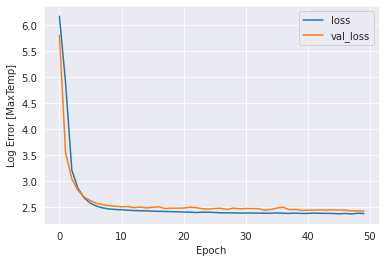

In [120]:
plot_loss(history)

In [132]:
# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 10.70 MSE (3.27 RMSE)
Test Score: 11.36 MSE (3.37 RMSE)


In [73]:
math.sqrt(mean_squared_error(y[-834:],df2.Max_Temp_2lag[-834:]))

4.2467592383813075

In [133]:
train_preds=model.predict(X_train)
test_preds=model.predict(X_test)
train_preds=pd.Series(train_preds.flatten(), index=df2.index[:train_size])
test_preds=pd.Series(test_preds.flatten(), index=df2.index[train_size:])

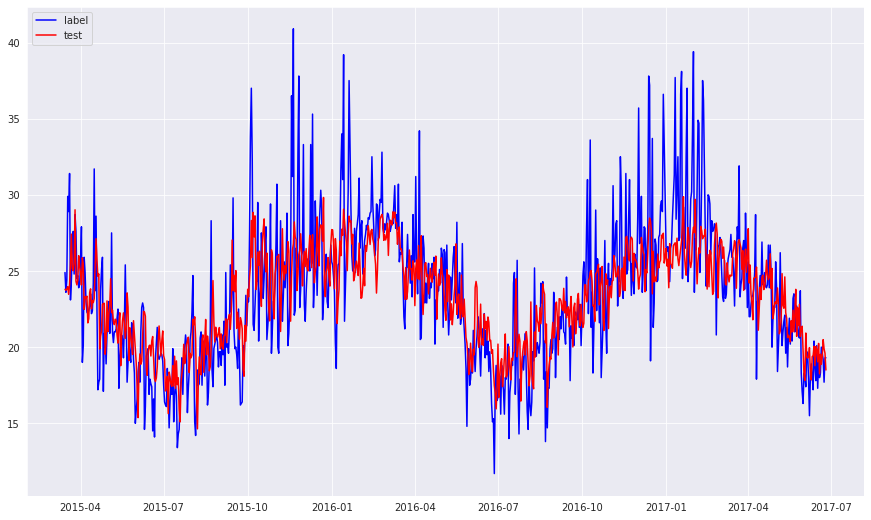

In [135]:
sns.set_style('darkgrid')

plt.subplots(figsize=(15,9))
plt.plot(y[-834:], color='blue')
#plt.plot(train_preds[:2000],color='green')
plt.plot(test_preds,color='red')
plt.legend(['label','test'],loc='upper left')

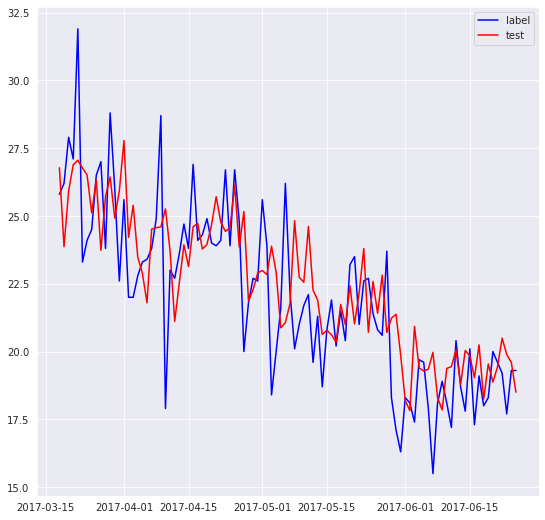

In [123]:
sns.set_style('darkgrid')
testsize=len(test_preds)
plt.subplots(figsize=(9,9))
plt.plot(y[-100:], color='blue')
#plt.plot(train_preds[-100:],color='green')
plt.plot(test_preds[-100:],color='red')
plt.legend(['label','test'],loc='upper right')

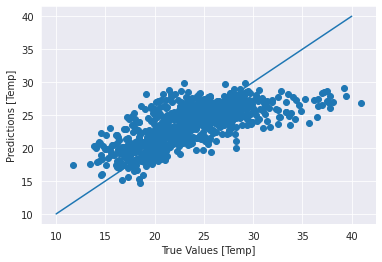

In [124]:
sns.set_style('darkgrid')

plt.scatter(y_test,test_preds)
plt.xlabel('True Values [Temp]')
plt.ylabel('Predictions [Temp]')

plt.plot([10,40], [10,40]);

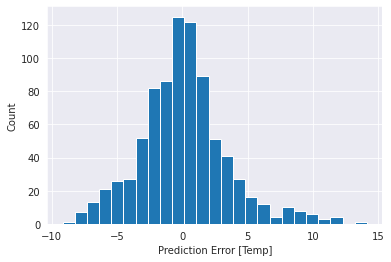

In [125]:
error = y_test - test_preds
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Temp]')
_=plt.ylabel('Count')

In [126]:
df['MaxTemp'].loc['2013-01-15':'2013-01-20']

Date
2013-01-15    24.9
2013-01-16    27.2
2013-01-17    29.0
2013-01-18    45.8
2013-01-19    24.8
2013-01-20    24.3
Freq: D, Name: MaxTemp, dtype: float64

In [129]:
train_preds.loc['2013-01-15':'2013-01-20']

Date
2013-01-15    25.362045
2013-01-16    22.890882
2013-01-17    26.605343
2013-01-18    26.946686
2013-01-19    27.512794
2013-01-20    28.327898
dtype: float32